In [ ]:
import seaborn as sns

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE, SelectFromModel

In [ ]:
import numpy as np

In [ ]:
!pip install category_encoders
import category_encoders as ce


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
# Replace "E:\\ALL CSVs\\fraud_insurance_claims.csv" with the actual path of your file
import pandas as pd
df = pd.read_csv("/work/fraud_insurance_claims.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17 00:00:00,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27 00:00:00,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06 00:00:00,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25 00:00:00,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06 00:00:00,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16 00:00:00,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,2014-01-05 00:00:00,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2003-02-17 00:00:00,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,2011-11-18 00:00:00,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [ ]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [ ]:
selected=['incident_state', 'insured_sex', 'policy_state', 'insured_education_level', 'insured_occupation', 'property_damage', 'insured_hobbies', 'insured_relationship', 'auto_model', 'auto_make', 'police_report_available', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted']
a = df[selected]
a

,incident_state,insured_sex,policy_state,insured_education_level,insured_occupation,property_damage,insured_hobbies,insured_relationship,auto_model,auto_make,police_report_available,incident_type,collision_type,incident_severity,authorities_contacted
0,SC,MALE,OH,MD,craft-repair,YES,sleeping,husband,92x,Saab,YES,Single Vehicle Collision,Side Collision,Major Damage,Police
1,VA,MALE,IN,MD,machine-op-inspct,?,reading,other-relative,E400,Mercedes,?,Vehicle Theft,?,Minor Damage,Police
2,NY,FEMALE,OH,PhD,sales,NO,board-games,own-child,RAM,Dodge,NO,Multi-vehicle Collision,Rear Collision,Minor Damage,Police
3,OH,FEMALE,IL,PhD,armed-forces,?,board-games,unmarried,Tahoe,Chevrolet,NO,Single Vehicle Collision,Front Collision,Major Damage,Police
4,NY,MALE,IL,Associate,sales,NO,board-games,unmarried,RSX,Accura,NO,Vehicle Theft,?,Minor Damage,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NC,FEMALE,OH,Masters,craft-repair,YES,paintball,unmarried,Accord,Honda,?,Single Vehicle Collision,Front Collision,Minor Damage,Fire
996,SC,FEMALE,IL,PhD,prof-specialty,YES,sleeping,wife,Passat,Volkswagen,?,Single Vehicle Collision,Rear Collision,Major Damage,Fire
997,NC,FEMALE,OH,Masters,armed-forces,?,bungie-jumping,other-relative,Impreza,Suburu,YES,Multi-vehicle Collision,Side Collision,Minor Damage,Police
998,NY,MALE,IL,Associate,handlers-cleaners,?,base-jumping,wife,A5,Audi,YES,Single Vehicle Collision,Rear Collision,Major Damage,Other


In [ ]:
encoder = ce.BinaryEncoder(cols=a)
encoded = encoder.fit_transform(df)
encoded

,months_as_customer,age,policy_number,policy_bind_date,policy_state_0,policy_state_1,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,...,auto_make_2,auto_make_3,auto_model_0,auto_model_1,auto_model_2,auto_model_3,auto_model_4,auto_model_5,auto_year,fraud_reported
0,328,48,521585,2014-10-17 00:00:00,0,1,250/500,1000,1406.91,0,...,0,1,0,0,0,0,0,1,2004,Y
1,228,42,342868,2006-06-27 00:00:00,1,0,250/500,2000,1197.22,5000000,...,1,0,0,0,0,0,1,0,2007,Y
2,134,29,687698,2000-09-06 00:00:00,0,1,100/300,2000,1413.14,5000000,...,1,1,0,0,0,0,1,1,2007,N
3,256,41,227811,1990-05-25 00:00:00,1,1,250/500,2000,1415.74,6000000,...,0,0,0,0,0,1,0,0,2014,Y
4,228,44,367455,2014-06-06 00:00:00,1,1,500/1000,1000,1583.91,6000000,...,0,1,0,0,0,1,0,1,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16 00:00:00,0,1,500/1000,1000,1310.80,0,...,0,1,1,0,0,0,0,0,2006,N
996,285,41,186934,2014-01-05 00:00:00,1,1,100/300,1000,1436.79,0,...,1,0,0,1,1,1,0,0,2015,N
997,130,34,918516,2003-02-17 00:00:00,0,1,250/500,500,1383.49,3000000,...,1,0,0,1,0,0,1,0,1996,N
998,458,62,533940,2011-11-18 00:00:00,1,1,500/1000,2000,1356.92,5000000,...,1,1,0,0,1,0,0,0,1998,N


In [ ]:
new = encoded.drop(columns={'incident_city', 'incident_location', 'policy_bind_date', 'policy_number', 'insured_zip', 'fraud_reported', 'policy_csl', 'incident_date'})
new.columns

Index(['months_as_customer', 'age', 'policy_state_0', 'policy_state_1',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex_0', 'insured_sex_1', 'insured_education_level_0',
       'insured_education_level_1', 'insured_education_level_2',
       'insured_occupation_0', 'insured_occupation_1', 'insured_occupation_2',
       'insured_occupation_3', 'insured_hobbies_0', 'insured_hobbies_1',
       'insured_hobbies_2', 'insured_hobbies_3', 'insured_hobbies_4',
       'insured_relationship_0', 'insured_relationship_1',
       'insured_relationship_2', 'capital-gains', 'capital-loss',
       'incident_type_0', 'incident_type_1', 'incident_type_2',
       'collision_type_0', 'collision_type_1', 'collision_type_2',
       'incident_severity_0', 'incident_severity_1', 'incident_severity_2',
       'authorities_contacted_0', 'authorities_contacted_1',
       'authorities_contacted_2', 'incident_state_0', 'incident_state_1',
       'incident_state_2', 'incid

In [ ]:
df.corr().head(80)

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368


In [ ]:
new.dtypes.head(60)

months_as_customer               int64
age                              int64
policy_state_0                   int64
policy_state_1                   int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex_0                    int64
insured_sex_1                    int64
insured_education_level_0        int64
insured_education_level_1        int64
insured_education_level_2        int64
insured_occupation_0             int64
insured_occupation_1             int64
insured_occupation_2             int64
insured_occupation_3             int64
insured_hobbies_0                int64
insured_hobbies_1                int64
insured_hobbies_2                int64
insured_hobbies_3                int64
insured_hobbies_4                int64
insured_relationship_0           int64
insured_relationship_1           int64
insured_relationship_2           int64
capital-gains                    int64
capital-loss             

<AxesSubplot: >

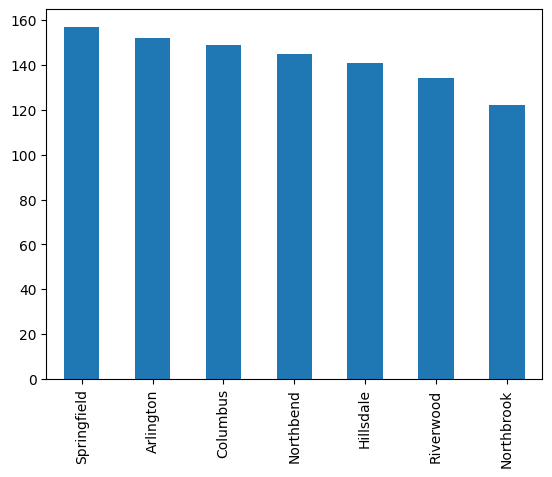

In [ ]:
df.incident_city.value_counts().plot(kind='bar')

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()


In [ ]:
from sklearn.naive_bayes import GaussianNB
g=GaussianNB()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
Y = df.fraud_reported
le = LabelEncoder()
y = le.fit_transform(Y)
X = new
se = StandardScaler()

X_Train, X_Test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train = se.fit_transform(X_Train)
X_test = se.transform(X_Test)

model = RandomForestClassifier(n_estimators=700, max_depth=30)
model.fit(X_train, y_train)
predict = model.predict(X_test)
accuracy = accuracy_score(y_test, predict)
accuracy
importances = model.feature_importances_
df_final = pd.DataFrame({'features': X_Train.columns, 'importances': importances})
df_final

,features,importances
0,months_as_customer,0.042754
1,age,0.035118
2,policy_state_0,0.006848
3,policy_state_1,0.005752
4,policy_deductable,0.011714
...,...,...
59,auto_model_2,0.006299
60,auto_model_3,0.006695
61,auto_model_4,0.006973
62,auto_model_5,0.007232


In [ ]:
X_train.shape

(800, 64)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

mudel = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[64]),
    layers.Dense(4, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])  

mudel.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = mudel.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=500,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, 
)    
pred = mudel.predict(X_test)
p = pred.round()
acc = accuracy_score(y_test, p)
acc

2024-01-10 09:02:17.251784: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-10 09:02:17.422791: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-01-10 09:02:17.422824: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-01-10 09:02:17.469558: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-10 09:02:18.462065: W tensorflow/stream_executor/platform/de

0.675

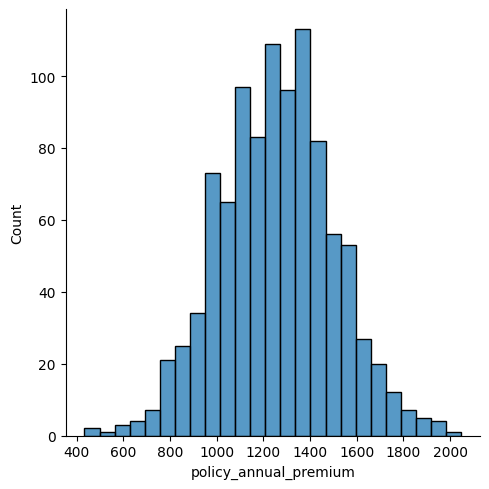

In [ ]:
sns.displot(df['policy_annual_premium'])

<AxesSubplot: xlabel='police_report_available', ylabel='count'>

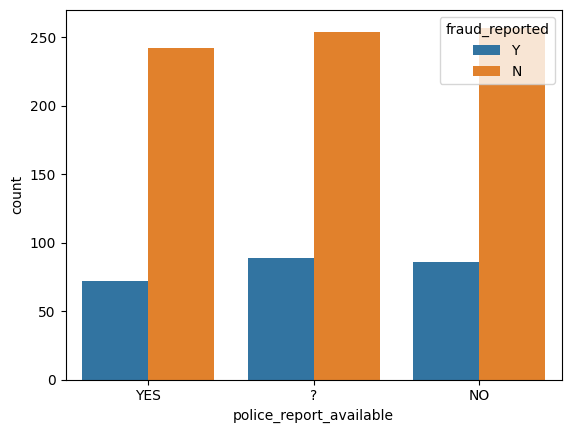

In [ ]:
sns.countplot(hue="fraud_reported", x="police_report_available", data=df)

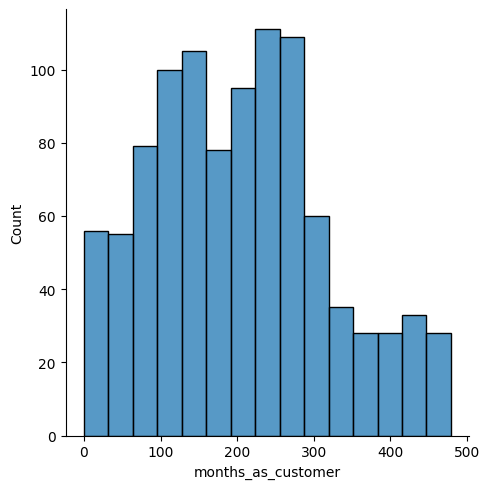

In [ ]:
sns.displot(df['months_as_customer']  )

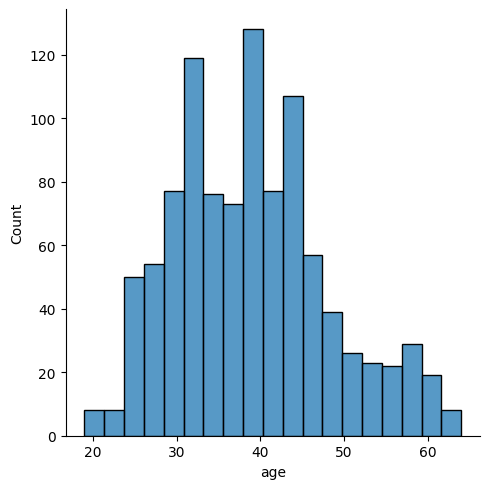

In [ ]:
sns.displot(df['age']  )

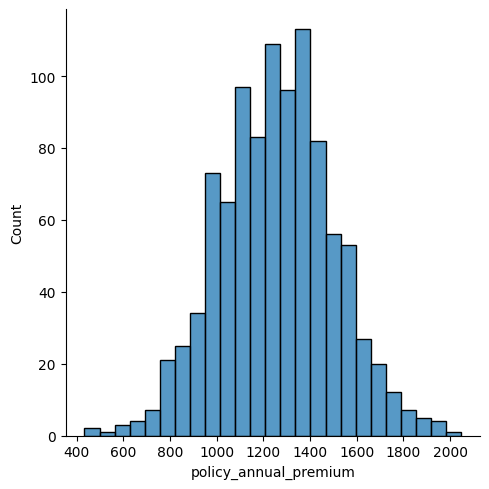

In [ ]:
sns.displot(df['policy_annual_premium']  )

<AxesSubplot: >

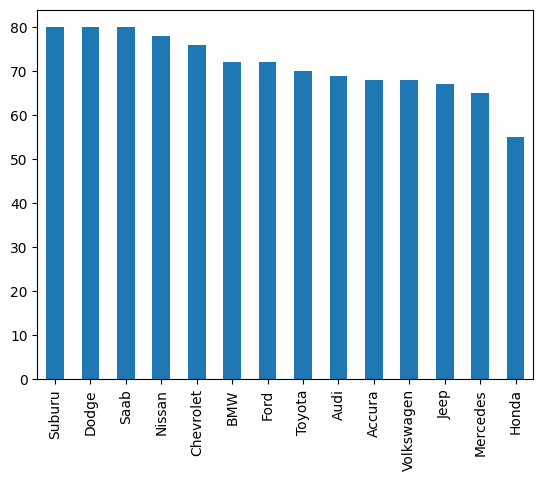

In [ ]:
df.auto_make.value_counts().plot(kind='bar')




In [ ]:
sns.swarmplot(y = 'policy_annual_premium', x = 'fraud_reported', data = df)

<AxesSubplot: xlabel='fraud_reported', ylabel='policy_annual_premium'>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a673e29a-adc2-4512-8ca0-841e39e5232f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>